# Code Explanation

In this document we will take a picture and compress it, using the code in the project, to understand how the code works.

## Functional Programming

[From Wikipedia](https://en.wikipedia.org/wiki/Functional_programming):

> functional programming is a style of building the structure and elements of computer programs—that treats computation as the evaluation of mathematical functions and **avoids changing-state and mutable data**.

> It is a declarative programming paradigm, which means programming is done with expressions or declarations instead of statements. **In functional code, the output value of a function depends only on the arguments that are passed to the function**. Eliminating side effects, i.e., changes in state that do not depend on the function inputs, can make it much easier to understand and predict the behavior of a program, which is one of the key motivations for the development of functional programming.

# Jupyter Notebook

> The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text.

### We achieve two goals
1. We present a good explanation in combination with the code.
2. We allow you to recover our code run in a very simple way. You can run our notebook through the jupyter notebook.

## The Code

Suppose there is a picture called `img.bmp`, first of all we'll have to read it into a matrix.

Because we do not deal with the .bmp file format, we use a common open source library called [OpenCV](https://opencv.org/).

In addition, in working with Python with matrices, it is common to work with a [numpy library](http://www.numpy.org/), which basically allows us to work with an object that is an **array of arrays**, but also adds useful calculation functions and affects performance by running C language calculations.

In [1]:
from cv2 import cv2
import numpy as np

### Reading Image
Remember, we write in functional programming, so for each action we define a function.

On the other hand, for the code to be readable, we will preserve the result of the function in the variable.

In [2]:
def get_matrix_from_file(path: str) -> np.ndarray:
    return cv2.imread(path)
original_img_matrix = get_matrix_from_file('src/original.png')

### View results
In the original code, we display the images using the cv2 library, but to display the images conveniently in the notebook, we will use the [matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) library.

In [3]:
import matplotlib.pyplot as plt
def show_matrix(matrix: np.ndarray, cmap=None):
    if cmap == 'BGR':
        matrix = cv2.cvtColor(matrix, cv2.COLOR_BGR2RGB)
    if cmap == 'YCrCb':
        matrix = cv2.cvtColor(matrix, cv2.COLOR_YCrCb2RGB)
    plt.imshow(matrix)
show_matrix(original_img_matrix, 'BGR')

### Entropy Calculation

Entropy formula: ![Entropy formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/9017e7f5171f1770f8bd702487f297b77df8a907)

In order to calculate entropy, we must first calculate the probability (frequency) of each unique value in the matrix. Therefore, we will write a function that calculates the frequency, and then use it to calculate the entropy.

In [4]:
import math
def __get_frequencies(matrix: np.ndarray, elements_count: int) -> list:
    return [c / elements_count for c in np.unique(matrix, return_counts=True)[1]]


def __get_entropy(freqs: list) -> float:
    return -sum(p * math.log2(p) for p in freqs)


def entropy(matrix: np.ndarray) -> float:
    return __get_entropy(__get_frequencies(matrix, np.prod(matrix.shape)))

In [5]:
original_img_matrix.shape

(512, 768, 3)

In [6]:
np.prod(original_img_matrix.shape) == original_img_matrix.shape[0] * original_img_matrix.shape[1] * original_img_matrix.shape[2]

True

In [7]:
np.unique(original_img_matrix, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

(The first matrix is the unique values, and the second matrix is their frequency. We are not really interested in the specific values themselves, but only in the number of times they appear, so we use the second matrix.)

In [8]:
entropy(original_img_matrix)

7.464190900258436

### Crop Image
Since we are dividing the matrix into matrices of 8x8, we will have to deal with a picture whose size is not divided by 8.

There are several options-

1. Delete the remaining pixels - this is damaging the image.
2. Attach the remaining pixels to the 8x8 matrix that contains them, so that there are matrices with overlapping pixels.
3. Leave the pixels as they are.
4. Create matrices with another shape but with equal amount of values (4x16, 2x32, 1x64)

We chose the first option precisely, to facilitate understanding. You are welcome to review the [project goals](README.md#Project_goals) again.

To balance the image, we divided the remaining pixels into the 2 sides of the image.

(512, 768, 3)

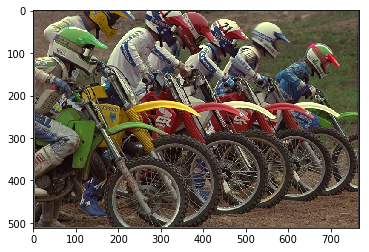

In [9]:
def crop_bitmap(bitmap: np.ndarray) -> np.ndarray:
    return bitmap[math.floor(bitmap.shape[0] % 8 / 2):bitmap.shape[0] - math.ceil(bitmap.shape[0] % 8 / 2),
                  math.floor(bitmap.shape[1] % 8 / 2):bitmap.shape[1] - math.ceil(bitmap.shape[1] % 8 / 2)]
crop_img = crop_bitmap(original_img_matrix)
show_matrix(crop_img, cmap='BGR')
crop_img.shape

### BGR to Y'CrCb

\begin{equation*}
Y = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B \\
Cr = (R-Y) \cdot 0.713 + 128 \\
Cb = (B-Y) \cdot 0.564 + 128
\end{equation*}